In [23]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
import time

In [6]:
lwf=datasets.fetch_lfw_people(min_faces_per_person=100,resize=0.4)

In [7]:
lwf.keys()

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])

In [8]:
lwf.data.shape

(1140, 1850)

In [9]:
lwf.images.shape

(1140, 50, 37)

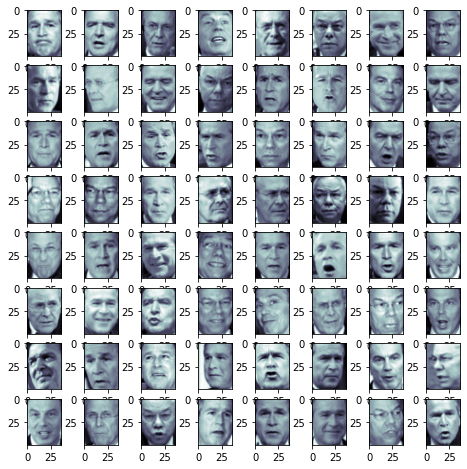

In [11]:
fig=plt.figure(figsize=(8,8))
for i in range(64):
    ax=fig.add_subplot(8,8,i+1)
    ax.imshow(lwf.images[i],cmap=plt.cm.bone)
plt.show()

In [13]:
x=lwf.data
y=lwf.target
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [16]:
pca=PCA()
pca.fit(x_train)

PCA()

In [18]:
k=0
total=sum(pca.explained_variance_)
current_varience=0
while (current_varience/total<0.99):
    current_varience+=pca.explained_variance_[k]
    k+=1
k

316

In [20]:
pca=PCA(n_components=k,whiten=True)
x_transformed=pca.fit_transform(x_train)
x_transformed.shape

(855, 316)

In [21]:
x_approx=pca.inverse_transform(x_transformed)
x_approx.shape

(855, 1850)

In [22]:
x_train_pca=x_transformed
x_test_pca=pca.transform(x_test)

In [26]:
clf=RandomForestClassifier()

start=time.time()
clf.fit(x_train,y_train)
end=time.time()
print(end-start)
y_pred=clf.predict(x_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

1.5328388214111328
              precision    recall  f1-score   support

           0       0.74      0.70      0.72        61
           1       0.90      0.25      0.39        36
           2       0.60      0.98      0.75       122
           3       1.00      0.16      0.28        31
           4       0.92      0.31      0.47        35

    accuracy                           0.66       285
   macro avg       0.83      0.48      0.52       285
weighted avg       0.75      0.66      0.61       285

[[ 43   0  18   0   0]
 [  6   9  21   0   0]
 [  2   0 120   0   0]
 [  3   1  21   5   1]
 [  4   0  20   0  11]]


In [27]:
start=time.time()
clf.fit(x_train_pca,y_train)
end=time.time()
print(end-start)
y_pred=clf.predict(x_test_pca)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.800710916519165
              precision    recall  f1-score   support

           0       0.62      0.25      0.35        61
           1       0.00      0.00      0.00        36
           2       0.46      0.98      0.63       122
           3       0.00      0.00      0.00        31
           4       1.00      0.06      0.11        35

    accuracy                           0.48       285
   macro avg       0.42      0.26      0.22       285
weighted avg       0.45      0.48      0.36       285

[[ 15   0  46   0   0]
 [  4   0  32   0   0]
 [  2   0 120   0   0]
 [  0   0  31   0   0]
 [  3   0  30   0   2]]


c:\Users\Armaan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Armaan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Armaan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
